# Parsing the Eora26 EE MRIO database

## Getting Eora26

The Eora 26 database is available at http://www.worldmrio.com . 

In the most simple case, you can get the full database in basic prices with (you need to agree to license conditions before download):

In [1]:
import pymrio

In [2]:
eora_storage = '/tmp/mrios/eora26'

In [3]:
eora_meta = pymrio.download_eora26(storage_folder=eora_storage, prices=['bp'])

The Eora MRIO is free for academic (university or grant-funded) work at degree-granting institutions. All other uses require a data license before the results are shared.

 When using Eora, the Eora authors ask you cite these publications: 

 Lenzen, M., Kanemoto, K., Moran, D., Geschke, A. Mapping the Structure of the World Economy (2012). Env. Sci. Tech. 46(15) pp 8374-8381. DOI:10.1021/es300171x 

 Lenzen, M., Moran, D., Kanemoto, K., Geschke, A. (2013) Building Eora: A Global Multi-regional Input-Output Database at High Country and Sector Resolution, Economic Systems Research,  25:1, 20-49, DOI:10.1080/09535314.2013.769 938

 
Do you agree with these conditions [y/n]: y


## Parse

To parse a single year do:

In [4]:
eora = pymrio.parse_eora26(year=2005, path=eora_storage)

/home/konstans/bin/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2530: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


## Explore

Eora includes (almost) all countries:

In [5]:
eora.get_regions()

Index(['AFG', 'ALB', 'DZA', 'AND', 'AGO', 'ATG', 'ARG', 'ARM', 'ABW', 'AUS',
       ...
       'TZA', 'USA', 'URY', 'UZB', 'VUT', 'VEN', 'VNM', 'YEM', 'ZMB', 'ZWE'],
      dtype='object', name='region', length=189)

This can easily be aggregated to, for example, the OECD/NON_OECD countries with the help of the [country converter coco](https://github.com/konstantinstadler/country_converter).

In [6]:
import country_converter as coco

In [7]:
eora.aggregate(region_agg = coco.agg_conc(original_countries='Eora',
                                          aggregates=['OECD'],
                                          missing_countries='NON_OECD')
              )

In [8]:
eora.get_regions()

Index(['NON_OECD', 'OECD'], dtype='object', name='region')

In [9]:
eora.calc_all()

/home/konstans/proj/pymrio/pymrio/core/mriosystem.py:886: PerformanceWarning: indexing past lexsort depth may impact performance.
  _data = pd.DataFrame(getattr(self, accounts[key]).ix[row].T)


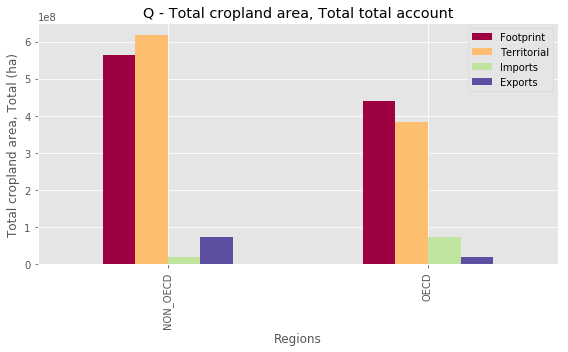

In [10]:
import matplotlib.pyplot as plt
with plt.style.context('ggplot'):
    eora.Q.plot_account(('Total cropland area', 'Total'), figsize=(8,5))
    plt.show()

See the other notebooks for further information on [aggregation](../notebooks/aggregation_examples.ipynb) and [file io](../notebooks/load_save_export.ipynb).